In [1]:
%pip install nltk PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
data = pd.read_csv("UpdatedResumeDataSet.csv")
data['cleaned'] = ''
data.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [4]:
print (data['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
data.shape

(962, 3)

In [6]:
print (data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

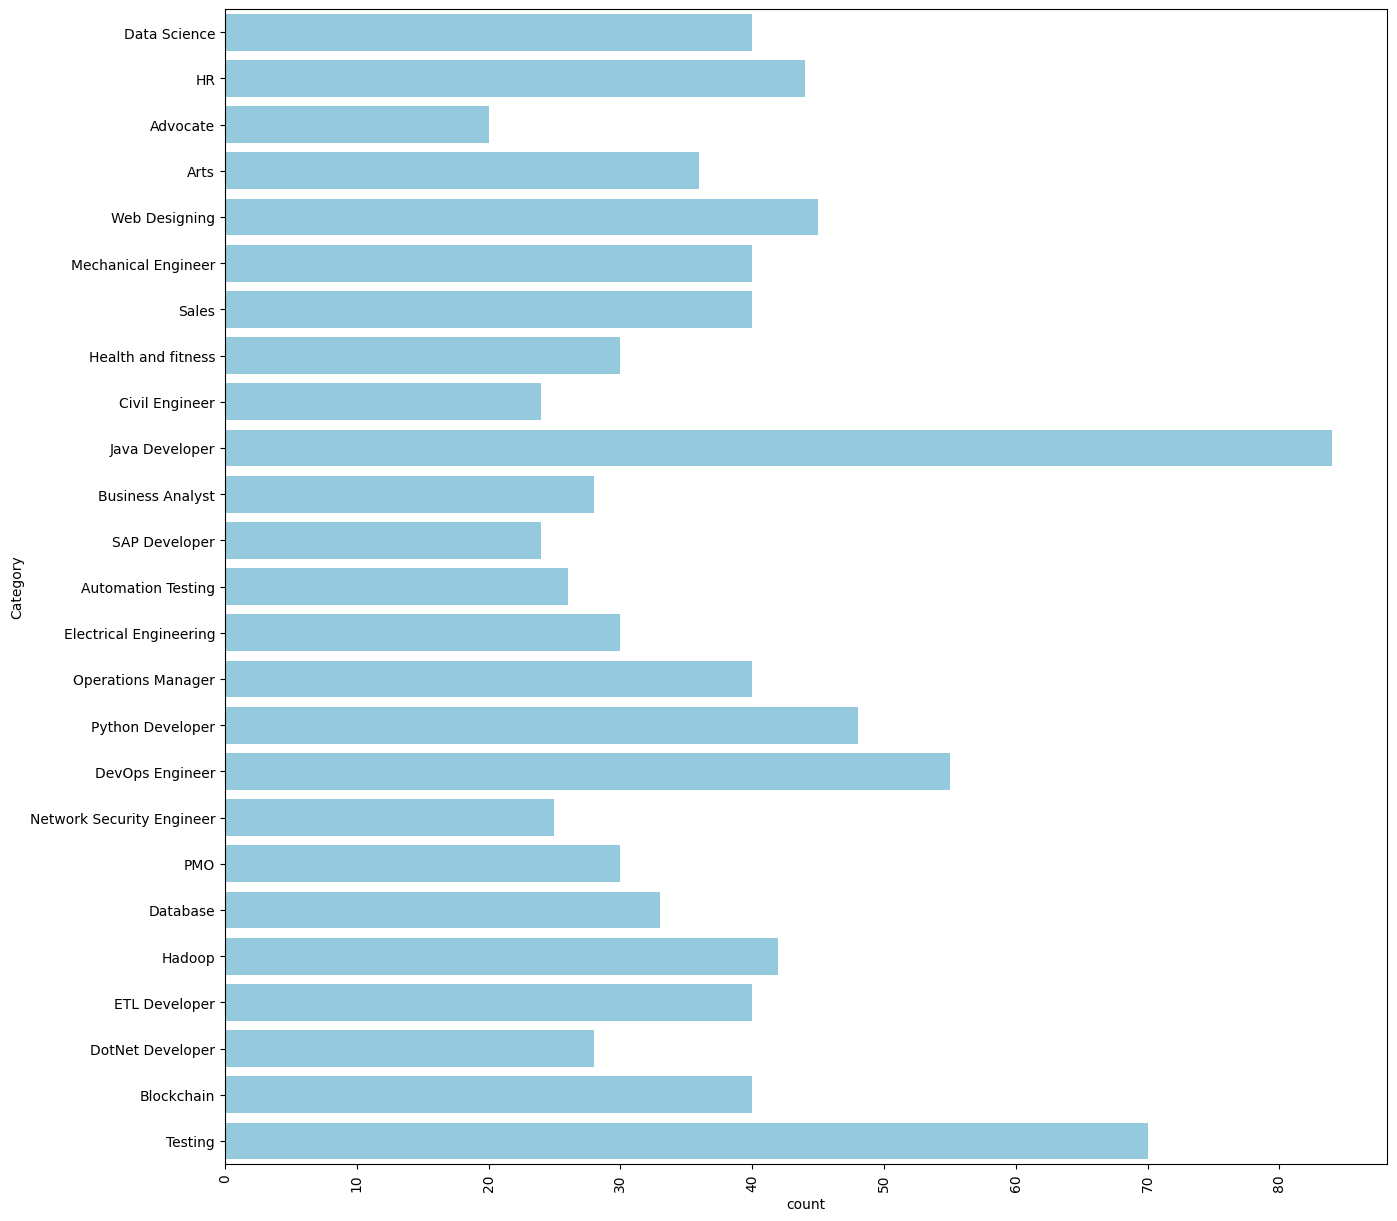

In [7]:

plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data, color='skyblue')

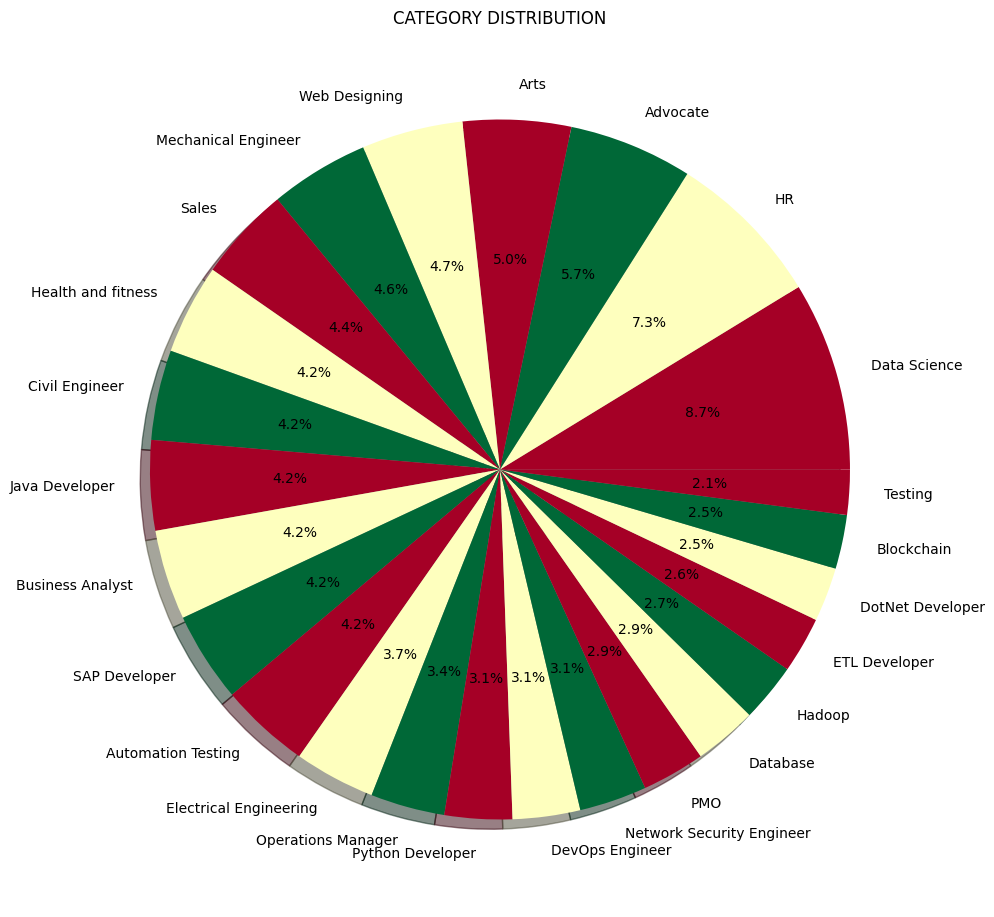

In [8]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('RdYlGn')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [10]:
data['cleaned'] = data.Resume.apply(lambda x: cleanResume(x))
print("Resume Data Cleaned")

Resume Data Cleaned


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SSN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SSN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
print ("Converted")
data.head(10)

Converted


,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visualization R Stu...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,Education Details B Tech Rayat and Bahra Insti...
8,6,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp techn...
9,6,Expertise â Data and Quantitative Analysis â...,Expertise Data and Quantitative Analysis Decis...


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['cleaned'].values
requiredTarget = data['Category'].values

In [14]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [15]:
import joblib

joblib.dump(word_vectorizer, 'word_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


model_1 = OneVsRestClassifier(KNeighborsClassifier())
model_1.fit(X_train, y_train)
prediction = model_1.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model_1.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model_1.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model_1, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

In [17]:
model_2 = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = model_2.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(model_2.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(model_2.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (model_2, metrics.classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.97

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.0

In [18]:
import joblib

joblib.dump(model_1, 'resumeClassify_model_1.pkl')
joblib.dump(model_2,'resumeClassify_model_2.pkl')


['resumeClassify_model_2.pkl']

In [19]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

# Example usage:
pdf_path = 'Resumes/Vijay Veerasekaran - Batch 2025 - B.Tech. - Information Technology - iF5nlmC.pdf'
resume_text = extract_text_from_pdf(pdf_path)

print(resume_text)

VIJAY VEERASEKARAN
B.Tech. - Information Technology
Ph: +91-6379435481
Email: vijay2110746@ssn.edu.in
Nagapattinam, Tamil Nadu, India - 614707 
Python Sql Flask API OOPs
BRIEF SUMMARY
I'm driven by a constant thirst for knowledge, which fuels my personal growth. Learning is more than a hobby—it's a mindset that shapes my life.
This enthusiasm has transformed my personal and professional journey, helping me adapt, acquire diverse skills, and face challenges positively. My
commitment to ongoing learning defines me, propelling me toward self-discovery and growth. In essence, my passion for learning propels me to
explore the unknown, adapt, and continually better myself.
KEY EXPERTISE
EDUCATION
2021  -  2025 Sri Sivasubramaniya Nadar College of Engineering
B.Tech. - Information Technology | CGPA: 7.98 / 10.00
2021 RVS BHARATH MATRICULATION SCHOOL, Nagapattinam
12th | TAMILNADU HIGHER SECONDARY BOARD | Percentage: 97.00 / 100.00
2019 RVS BHARATH MATRICULATION SCHOOL, Nagapattinam
10th | TNB

In [20]:
import joblib

# Load the trained model_1
model_1 = joblib.load('resumeClassify_model_1.pkl')
model_2 = joblib.load('resumeClassify_model_2.pkl')

cleaned_real_world_resume = cleanResume(resume_text)  

print(cleaned_real_world_resume)

vectorized_resume = word_vectorizer.transform([cleaned_real_world_resume])

#print(cleaned_real_world_resume)

predicted_category_1 = model_1.predict(vectorized_resume)
predicted_category_2 = model_2.predict(vectorized_resume)

predicted_category_label_1 = le.inverse_transform(predicted_category_1)
predicted_category_label_2 = le.inverse_transform(predicted_category_2)

print("Predicted category:", predicted_category_label_1)
print("Predicted category:", predicted_category_label_2)

VIJAY VEERASEKARAN B Tech Information Technology Ph 91 6379435481 Email vijay2110746 Nagapattinam Tamil Nadu India 614707 Python Sql Flask API OOPs BRIEF SUMMARY I m driven by a constant thirst for knowledge which fuels my personal growth Learning is more than a hobby it s a mindset that shapes my life This enthusiasm has transformed my personal and professional journey helping me adapt acquire diverse skills and face challenges positively My commitment to ongoing learning defines me propelling me toward self discovery and growth In essence my passion for learning propels me to explore the unknown adapt and continually better myself KEY EXPE ISE EDUCATION 2021 2025 Sri Sivasubramaniya Nadar College of Engineering B Tech Information Technology CGPA 7 98 10 00 2021 RVS BHARATH MATRICULATION SCHOOL Nagapattinam 12th TAMILNADU HIGHER SECONDARY BOARD Percentage 97 00 100 00 2019 RVS BHARATH MATRICULATION SCHOOL Nagapattinam 10th TNBSE Percentage 98 00 100 00 Course Works Key Courses Taken P